In [1]:
from brian2 import *
%matplotlib inline

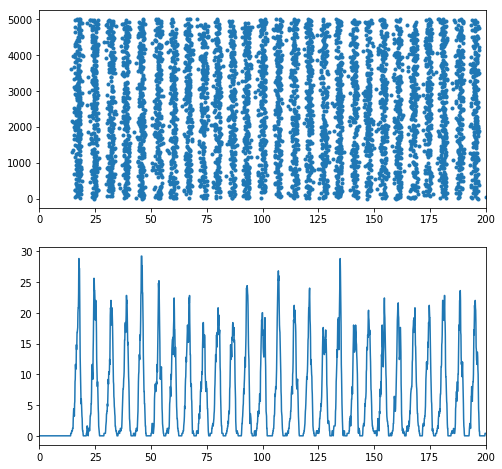

In [41]:
N = 5000
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .2*second

# Parameters we will play with
sparseness = 0.1  # network probability of connections
J = .1*mV         # synaptic "strength" one spike leads to this change in voltage
muext = 25*mV     # tonic drive current
sigmaext = 1*mV   # strength of external noise

# Equations of motion
# note: xi is white noise
eqs = """
dV/dt = (-V + muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr
conn = Synapses(group, group, on_pre='V += -J', delay=delta)
conn.connect(p=sparseness)
M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)

run(duration)

figure(figsize=(8,8))
subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)

subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)
#xlim([0,500])
show()
